<div style="display: flex; justify-content: center;">
    <img src="./stackoverflow2021.png" style="width:496px; height:400px;">
    <img src="./stackoverflow2022.png" style="width:496px; height:386px;">
</div>

<center><h1> Data Analysis using Stackoverflow’s 2021 and 2022 Annual Developer Survey.</h1></center>

## The CRISP-DM process encompasses 5 main stages, namely:

- Business Understanding
- Data Understanding
- Prepare Data
- Data Modeling
- Evaluate the Results


# Business Understanding

This work explores the 2021 and 2022 Stack Overflow surveys about the developers market. We start by selecting information about the most surveyed countries and pick one of them. Then we want to know the most famous language used in that country and the most used language among professional programmers. Finally, we want to know how which languages are demanded by the bigest companies.

The main questions we want to answer are:

1. Which are the most surveyed countries by Stackoverflow in 2021 and 2022?
2. Which countries have the most professional developers surveyed in 2021/2022?
3. Given a list of popular languages such as C, C++, C#, Java, Python, R, JavaScript, and PHP, which of them are the most famous among professional programmers in 2021/2022? 
4. Which of them are the most popular among professional programmers in the USA in 2021/2022?
5. Which of them are the most popular within big companies in the USA in 2021/2022?

# Data Understanding

In order to gain deeper understanding of the data, we will follow the steps:
* Handle categorical and missing data (if necessary)
* Analyze, Model, and Visualize

In [1]:
# Import libraries to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# Import libraries to make insightful plots
import matplotlib.pyplot as plt
import seaborn as sns

# Display graphs in jupyter notebook
%matplotlib inline

# Removing warnings
import warnings
warnings.filterwarnings("ignore")

# Visualize all columns in dataframes
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Loading Stackoverflow survey datasets of 2021 and 2022
# Ref links: 
# https://insights.stackoverflow.com/survey/2021
# https://survey.stackoverflow.co/2022
survey_2021 = pd.read_csv('../stackoverflow2021/survey_results_responses.csv')
survey_2022 = pd.read_csv('../stackoverflow2022/survey_results_public.csv')

In [3]:
print(survey_2021.shape)
print(survey_2022.shape)

(83439, 48)
(73268, 79)


In [4]:
survey_2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OperatingSystem,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQ

In [5]:
survey_2022.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

# Data Preparing

## 1. Which are the most surveyed countries by SO in 2021/2022?

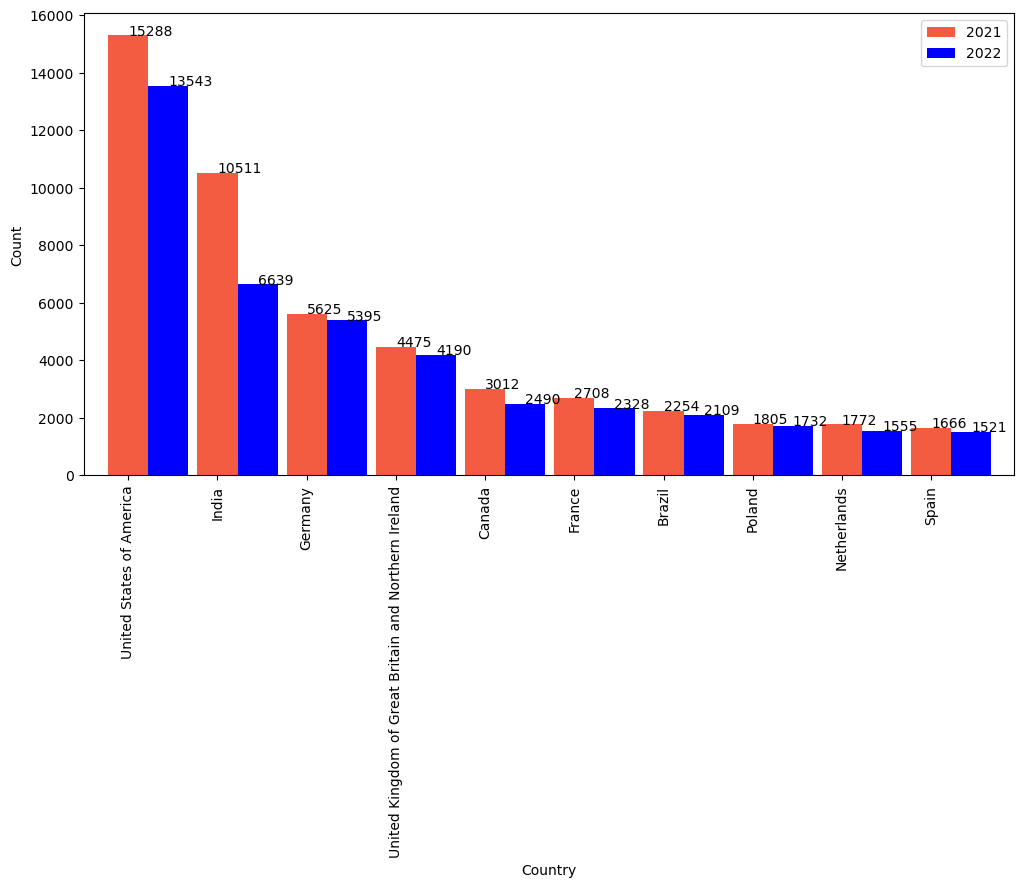

In [6]:
# Create a plot that shows the number of surveyed developers by country
plt.subplots(figsize=(12, 6))

ax = survey_2021['Country'].value_counts()[:10].plot.bar(width=0.45, color='#f45c42', position=1, align='edge')
ax = survey_2022['Country'].value_counts()[:10].plot.bar(width=0.45, color='#0000FF', position=0, align='edge')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 0.25))
    
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(['2021', '2022'])

# Adjust the x-limits to move the bars to the right
plt.xlim(-0.5)

plt.show()

## Let's focus our analysis on professional programmers

## 2. Which countries had the most professional developers surveyed in 2021/2022? 

In [7]:
# Create a plot that shows number of professional developers by countries
def plot_country_comparison(dataset_year1, dataset_year2, category, key):
    
    '''
    Filter 'dataset_1' and 'dataset_2' based on a single category given by key
    '''
    professionals_year1 = dataset_year1[dataset_year1[category] == key]
    professionals_year2 = dataset_year2[dataset_year1[category] == key]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    '''
    Plot the number of surveyed professionals against country for two ("consecutive") years
    '''
    ax = professionals_year1['Country'].value_counts()[:10].plot.bar(width=0.45, color='#FFA500', position=1, align='edge')
    ax = professionals_year2['Country'].value_counts()[:10].plot.bar(width=0.45, color='#a454ff', position=0, align='edge')
    
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 0.25))
        
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.legend(['2021', '2022'])
    
    # Adjust the x-limits to move the bars to the right
    plt.xlim(-0.5)
    
    plt.show()
    
    return professionals_year1, professionals_year2

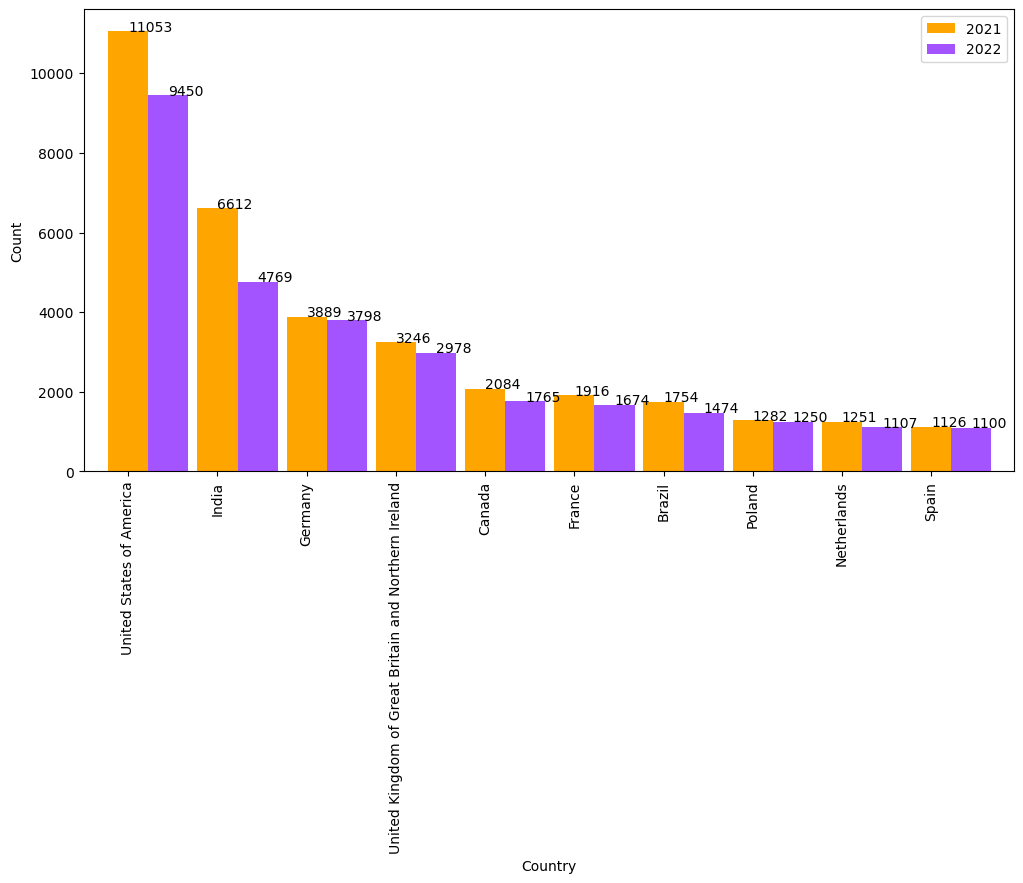

In [8]:
professionals_2021, professionals_2022 = plot_country_comparison(survey_2021, survey_2022,'MainBranch','I am a developer by profession')


# Data Modeling

## Let's focus on a list of popular programming languages such as C, C++, C#, Java, Python, R, JavaScript, and PHP

## 3. Which of them are the most famous among professional programmers in 2021/2022?

In [9]:
# Create a list of popular programming languages
lang_list = ['C', 'C++', 'C#', 'Java', 'Python', 'R', 'JavaScript', 'PHP']

def plot_filtered_by_language(lang_list, filtered_data1, filtered_data2, lang_key):

    '''
    Based on a list of popular programming languages and two filtered 'filtered_dataset_1' and 'filtered_dataset_2' 
    create a dataframe with number of programmers sorted by language and year
    '''
    results_2021 = [filtered_data1[lang_key].apply(lambda x: i in str(x).split('; ')).value_counts()[1] for i in lang_list]
    results_2022 = [filtered_data2[lang_key].apply(lambda x: i in str(x).split('; ')).value_counts()[1] for i in lang_list]

    df = pd.DataFrame({'Language': lang_list, '2021': results_2021, '2022': results_2022})

    print(df)

    
    '''
    Plot the number of global surveyed professional programmers against their prefered language for two 
    ("consecutive") years
    '''
    df.plot.barh(x='Language', y=['2021', '2022'], figsize=(12, 6), width=0.9) #color=['#005544', '#808080']
    plt.xlabel('Count')
    plt.ylabel('Language')
    plt.title('Language Usage Comparison Worldwide - 2021/2022')
    plt.legend(['2021', '2022'])
    plt.show()
    
    return df

     Language  2021  2022
0           C    59    53
1         C++   156   129
2          C#   480   393
3        Java   529   376
4      Python   558   670
5           R    17    42
6  JavaScript   198   271
7         PHP   107    88


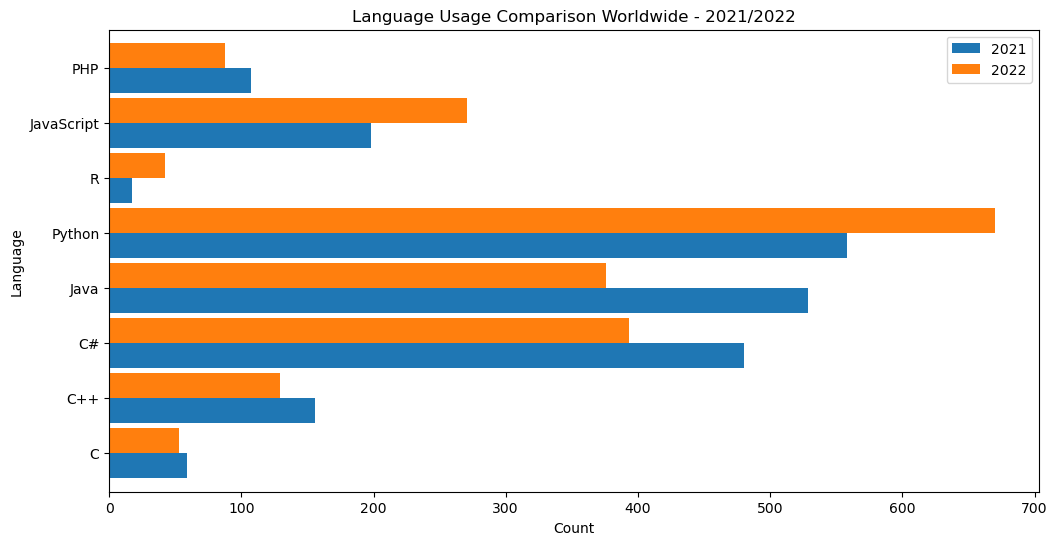

In [10]:
df1 = plot_filtered_by_language(lang_list, professionals_2021, professionals_2022, 'LanguageHaveWorkedWith')

## 4. Which of them are the most popular among professional programmers in the USA in 2021/2022?

In [11]:
def plot_double_filtered_by_language(dataset_year1, dataset_year2, category1, category2, key1, key2, lang_list, lang_key):

    '''
    Based on a list of popular programming languages, two datasets 'dataset_year1' and 'dataset_year2', and two 
    filtering parameters 'category1' and 'category2', filter the datasets using the given categories and
    create a dataframe with number of programmers sorted by language and year
    '''
    filtered_data1 = dataset_year1[(dataset_year1[category1] == key1) & 
                                                (dataset_year1[category2] == key2)]
    filtered_data2 = dataset_year2[(dataset_year2[category1] == key1) & 
                                                (dataset_year2[category2] == key2)]
    
    results_2021 = [filtered_data1[lang_key].apply(lambda x: i in str(x).split('; ')).
                    value_counts().get(1, 0) for i in lang_list]
    results_2022 = [filtered_data2[lang_key].apply(lambda x: i in str(x).split('; ')).
                    value_counts().get(1, 0) for i in lang_list]
    
    df = pd.DataFrame({'Language': lang_list, '2021': results_2021, '2022': results_2022})

    print(df)

    '''
    Plot the number of surveyed professional programmers in USA against their prefered language for two 
    ("consecutive") years 
    '''
    df.plot.barh(x='Language', y=['2021', '2022'], figsize=(12, 6), width=0.9, color=['#005544', '#808080'])
    plt.xlabel('Count (only )')
    plt.ylabel('Language')
    plt.title('Language Usage Comparison among Professional Programmers - USA 2021/2022')
    plt.legend(['2021', '2022'])
    plt.show()
    
    return df

     Language  2021  2022
0           C     9     2
1         C++    34    23
2          C#    78    62
3        Java    44    36
4      Python    80    64
5           R     4     3
6  JavaScript    20    40
7         PHP     1     4


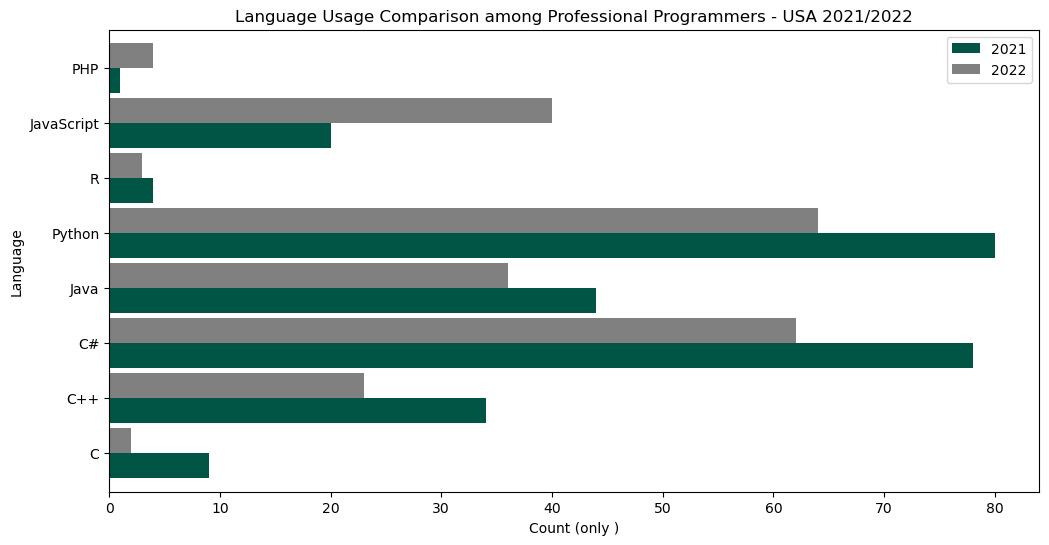

In [12]:
df2 = plot_double_filtered_by_language(survey_2021, survey_2022, 'MainBranch', 'Country', 
                                       'I am a developer by profession', 'United States of America', lang_list, 'LanguageHaveWorkedWith')

## 5. Which of them are the most popular within big companies in the USA in 2021/2022?

In [13]:
def plot_double_filtered_by_language2(dataset_year1, dataset_year2, category1, category2, key1, key2, lang_list, lang_key):

    '''
    Based on a list of popular programming languages, two datasets 'dataset_year1' and 'dataset_year2', and two 
    filtering parameters 'category1' and 'category2', filter the datasets using the given categories and
    create a dataframe with number of programmers sorted by language and year
    '''
    filtered_data1 = dataset_year1[(dataset_year1[category1] == key1) & 
                                                (dataset_year1[category2] == key2)]
    filtered_data2 = dataset_year2[(dataset_year2[category1] == key1) & 
                                                (dataset_year2[category2] == key2)]
    
    results_2021 = [filtered_data1[lang_key].apply(lambda x: i in str(x).split('; ')).
                    value_counts().get(1, 0) for i in lang_list]
    results_2022 = [filtered_data2[lang_key].apply(lambda x: i in str(x).split('; ')).
                    value_counts().get(1, 0) for i in lang_list]
    
    df = pd.DataFrame({'Language': lang_list, '2021': results_2021, '2022': results_2022})

    print(df)

    '''
    Plot the number of surveyed programmers who works for big companies in USA against their prefered language 
    for two ("consecutive") years 
    '''
    df.plot.barh(x='Language', y=['2021', '2022'], figsize=(12, 6), width=0.9, color=['#00FF00', '#A52A2A'])
    plt.xlabel('Count')
    plt.ylabel('Language')
    plt.title('Language Usage Comparison among Big Companies - USA 2021/2022')
    plt.legend(['2021', '2022'])
    plt.show()
    
    return df

     Language  2021  2022
0           C     3     1
1         C++     9     6
2          C#    22    16
3        Java    16    12
4      Python    29    14
5           R     8     3
6  JavaScript     6    10
7         PHP     1     0


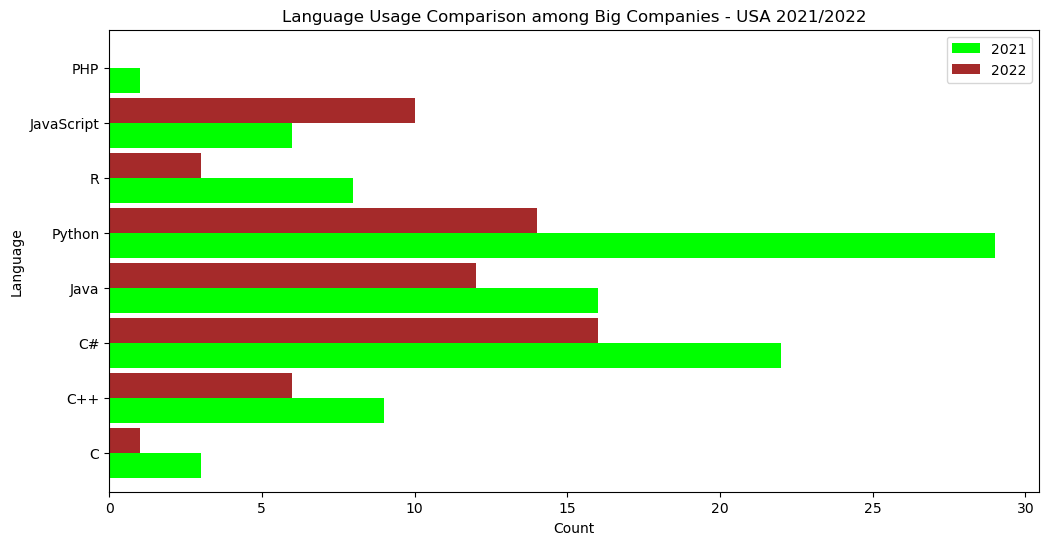

In [14]:
df3 = plot_double_filtered_by_language2(survey_2021,survey_2022,'OrgSize','Country','10,000 or more employees','United States of America',lang_list,'LanguageHaveWorkedWith')

# Results Evaluation

1. The first plot indicates that the **USA** was the leader in number of surveyed developers in the world for the years 2021 and 2022. **India** took the the sencond place with nealy half of developers compared with **USA**.

2. Filtering the original surveys of 2021 and 2022 by keeping only professional programmers, the **USA** was again the leader with the highest number of professional programmers in both years.

3. Given a list of popular programming languages comprised by C, C++, C#, Java, Python, R, JavaScript, and PHP, the third plot shows that Python was the favorite language used by professional programmers around the world during the pandemics (2021/2022).

4. Restriting the previous analysis further by looking at the professional developers in the **USA** only, the fourth plot shows that Python and C# are the most popular languages in this country.

5. Finally, changing the first filter of the previous analysis by including all kinds of developers in the **USA** and considering only programmers that work for big companies, the fith plot shows that Python was the big organizations preference in 2021 but C# took the lead in 2022.